In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../output/result.csv')


In [3]:
fitur = ['curah_hujan_mm',
         'kemiringan_persen','banjir_historis']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[fitur])

# Konversi ke DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=fitur)

print(data_scaled_df)


     curah_hujan_mm  kemiringan_persen  banjir_historis
0          0.514851           0.093333         0.666667
1          0.578827           0.040000         0.000000
2          0.537700           0.066667         0.166667
3          0.868241           0.106667         0.833333
4          0.620716           0.133333         0.166667
..              ...                ...              ...
102        0.986291           0.093333         0.500000
103        0.651942           0.040000         0.666667
104        0.613861           0.066667         0.500000
105        0.846915           0.080000         0.666667
106        0.911653           0.053333         0.666667

[107 rows x 3 columns]


In [4]:
# === 4. Jalankan K-Means ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['klaster'] = kmeans.fit_predict(data_scaled)
print(data)

     id  latitude   longitude  curah_hujan_mm  kemiringan_persen  \
0   NaN  0.894087  123.125136            2558                  7   
1   NaN  0.896474  123.165318            2642                  3   
2   NaN  0.920308  123.136650            2588                  5   
3   NaN  0.910363  123.100894            3022                  8   
4   NaN  0.921370  123.132750            2697                 10   
..   ..       ...         ...             ...                ...   
102 NaN  0.885318  123.629745            3177                  7   
103 NaN  0.877609  123.651633            2738                  3   
104 NaN  0.843426  123.574009            2688                  5   
105 NaN  0.879945  123.503687            2994                  6   
106 NaN  0.858870  123.456972            3079                  4   

     banjir_historis           desa  klaster klaster_banjir  
0                  4    Batubantayo        1         Tinggi  
1                  0      Batutajam        2         Rendah

In [5]:
# === 5. Pemetaan label klaster ke zonasi ===
mapping = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}

     id  latitude   longitude  curah_hujan_mm  kemiringan_persen  \
0   NaN  0.894087  123.125136            2558                  7   
1   NaN  0.896474  123.165318            2642                  3   
2   NaN  0.920308  123.136650            2588                  5   
3   NaN  0.910363  123.100894            3022                  8   
4   NaN  0.921370  123.132750            2697                 10   
..   ..       ...         ...             ...                ...   
102 NaN  0.885318  123.629745            3177                  7   
103 NaN  0.877609  123.651633            2738                  3   
104 NaN  0.843426  123.574009            2688                  5   
105 NaN  0.879945  123.503687            2994                  6   
106 NaN  0.858870  123.456972            3079                  4   

     banjir_historis           desa  klaster klaster_banjir  
0                  4    Batubantayo        1         Tinggi  
1                  0      Batutajam        2         Rendah

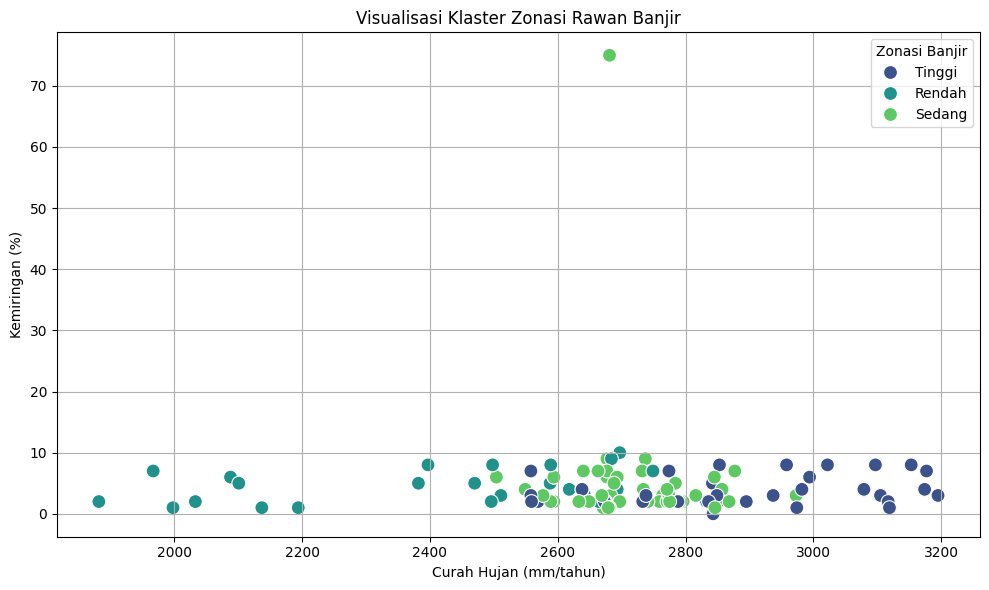

<Figure size 640x480 with 0 Axes>

In [7]:
# Urutkan berdasarkan elevasi rata-rata per klaster (agar labelnya masuk akal)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=fitur)
order = centers['curah_hujan_mm'].argsort().values
label_map = {old: mapping[new] for new, old in enumerate(order)}
data['klaster_banjir'] = data['klaster'].map(label_map)
print(data)
# === 6. Simpan hasilnya ke CSV ===
# data.to_csv("hasil_klaster_banjir_terbaru.csv", index=False)
# === 7. Visualisasi ===
# Buat ukuran plot besar
plt.figure(figsize=(10, 6))
# Plot scatter dengan warna sesuai klaster banjir
sns.scatterplot(
    data=data,
    x='curah_hujan_mm',
    y='kemiringan_persen',
    hue='klaster_banjir',
    palette='viridis',
    s=100
)

plt.title("Visualisasi Klaster Zonasi Rawan Banjir")
plt.xlabel("Curah Hujan (mm/tahun)")
plt.ylabel("Kemiringan (%)")
plt.legend(title="Zonasi Banjir")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('../storage/klaster_banjir.png', dpi=300, bbox_inches='tight')


In [20]:
claster = pd.read_csv('hasil_klaster_banjir.csv')
print(claster)

      id  latitude   longitude  elevation_m  curah_hujan_mm  jarak_sungai_m  \
0      1 -0.842509  123.067926           76            2915              58   
1      2 -0.830986  123.061444           41            3131              51   
2      3 -0.835360  123.052381           91            2763             175   
3      4 -0.838027  123.072552          109            2781              91   
4      5 -0.846880  123.067389          117            2931             300   
..   ...       ...         ...          ...             ...             ...   
495  496 -0.842933  123.043663           87            2500             206   
496  497 -0.838327  123.076693           90            2643             276   
497  498 -0.848445  123.045473           53            2889             277   
498  499 -0.830512  123.078009           49            2411              83   
499  500 -0.830276  123.057840           66            2638              17   

     kemiringan_persen     landuse  banjir_historis